In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.layers import Dense, Convolution2D, MaxPooling2D, Activation, Flatten
from keras.layers import Reshape, UpSampling2D, ZeroPadding2D, Input
from keras.models import Sequential, Model

Using TensorFlow backend.


In [2]:
data_path = '../../Dataset/JPEGImages/'

In [3]:
ims = os.listdir(data_path)

select_ims = []
for ix in range(4000):
    if '.jpg' in ims[ix]:
        img = cv2.imread(data_path + ims[ix])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        select_ims.append(img)
print len(select_ims)

4000


In [4]:
data = np.asarray(select_ims)
print data.shape

(4000, 64, 64, 3)


In [5]:
# save dataset
# np.save('image_data', data)

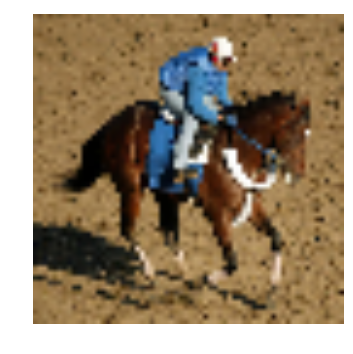

In [6]:
nx = 12
plt.figure(0)
plt.axis("off")
plt.imshow(data[nx])

plt.show()

In [9]:
split = int(0.8 * data.shape[0])

X_train = data[:split]/255.0
X_val = data[split:]/255.0

print X_train.shape, X_val.shape
print X_train.mean()

(3200, 64, 64, 3) (800, 64, 64, 3)
0.432566064473


In [10]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, activation='relu'))
model.add(Convolution2D(8, 3, 3, activation='relu'))

# Decode
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 62, 62, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 60, 60, 64)    18496       convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 30, 30, 64)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 26, 26, 16)    25616       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [11]:
hist = model.fit(X_train, X_train,
                nb_epoch=10,
                shuffle=True,
                validation_data=(X_val, X_val), verbose=2)

Train on 3200 samples, validate on 800 samples
Epoch 1/10
11s - loss: 0.0516 - acc: 0.4508 - val_loss: 0.0245 - val_acc: 0.5314
Epoch 2/10
9s - loss: 0.0205 - acc: 0.5778 - val_loss: 0.0182 - val_acc: 0.6115
Epoch 3/10
9s - loss: 0.0164 - acc: 0.6035 - val_loss: 0.0149 - val_acc: 0.6042
Epoch 4/10
9s - loss: 0.0144 - acc: 0.6160 - val_loss: 0.0139 - val_acc: 0.6353
Epoch 5/10
9s - loss: 0.0135 - acc: 0.6216 - val_loss: 0.0127 - val_acc: 0.6490
Epoch 6/10
9s - loss: 0.0127 - acc: 0.6239 - val_loss: 0.0121 - val_acc: 0.6480
Epoch 7/10
9s - loss: 0.0122 - acc: 0.6248 - val_loss: 0.0118 - val_acc: 0.6454
Epoch 8/10
9s - loss: 0.0118 - acc: 0.6292 - val_loss: 0.0112 - val_acc: 0.6455
Epoch 9/10
10s - loss: 0.0113 - acc: 0.6271 - val_loss: 0.0109 - val_acc: 0.6039
Epoch 10/10
10s - loss: 0.0109 - acc: 0.6308 - val_loss: 0.0105 - val_acc: 0.6487


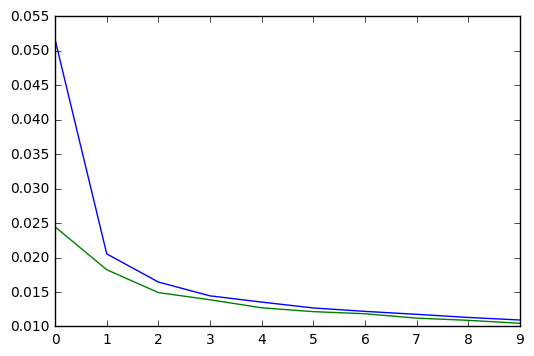

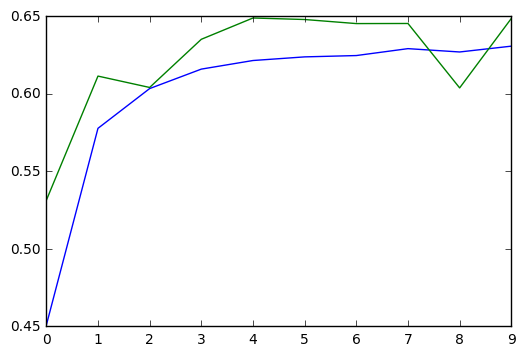

In [12]:
th = hist.history

plt.figure(0)
plt.plot(th['loss'], 'b')
plt.plot(th['val_loss'], 'g')

plt.figure(1)
plt.plot(th['acc'], 'b')
plt.plot(th['val_acc'], 'g')

In [ ]:
out = model.predict()